In [1]:
!nvidia-smi

Sat Aug 10 10:37:28 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   56C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [2]:
import os
HOME = os.getcwd()
print(HOME)

/content


## Install YOLOv8

⚠️ YOLOv8 is still under heavy development. Breaking changes are being introduced almost weekly. We strive to make our YOLOv8 notebooks work with the latest version of the library. Last tests took place on **18.01.2023** with version **YOLOv8.0.9**.

If you notice that our notebook behaves incorrectly - especially if you experience errors that prevent you from going through the tutorial - don't hesitate! Let us know and open an [issue](https://github.com/roboflow/notebooks/issues) on the Roboflow Notebooks repository.

YOLOv8 can be installed in two ways - from the source and via pip. This is because it is the first iteration of YOLO to have an official package.

In [3]:
# Pip install method (recommended)

!pip install ultralytics==8.2.74

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.2.74 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 33.6/78.2 GB disk)


In [4]:
from ultralytics import YOLO

from IPython.display import display, Image

## CLI Basics

If you want to train, validate or run inference on models and don't need to make any modifications to the code, using YOLO command line interface is the easiest way to get started. Read more about CLI in [Ultralytics YOLO Docs](https://v8docs.ultralytics.com/cli/).

```
yolo task=detect    mode=train    model=yolov8n.yaml      args...
          classify       predict        yolov8n-cls.yaml  args...
          segment        val            yolov8n-seg.yaml  args...
                         export         yolov8n.pt        format=onnx  args...
```

## Inference with Pre-trained COCO Model

### 💻 CLI

`yolo mode=predict` runs YOLOv8 inference on a variety of sources, downloading models automatically from the latest YOLOv8 release, and saving results to `runs/predict`.

In [5]:
%cd {HOME}
!yolo task=detect mode=predict model=yolov8m.pt conf=0.25 source='https://media.roboflow.com/notebooks/examples/dog.jpeg'

/content
100% 49.7M/49.7M [00:00<00:00, 357MB/s]
Ultralytics YOLOv8.2.74 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8m summary (fused): 218 layers, 25,886,080 parameters, 0 gradients, 78.9 GFLOPs

100% 104k/104k [00:00<00:00, 134MB/s]
image 1/1 /content/dog.jpeg: 640x384 1 person, 1 car, 1 dog, 1 backpack, 83.0ms
Speed: 10.2ms preprocess, 83.0ms inference, 1310.7ms postprocess per image at shape (1, 3, 640, 384)
Results saved to runs/detect/predict
💡 Learn more at https://docs.ultralytics.com/modes/predict


In [ ]:
# %cd {HOME}
# Image(filename='runs/detect/predict/dog.jpeg', height=600)

### 🐍 Python SDK

The simplest way of simply using YOLOv8 directly in a Python environment.

In [6]:
model = YOLO(f'{HOME}/yolov8m.pt')
results = model.predict(source='https://media.roboflow.com/notebooks/examples/dog.jpeg', conf=0.25)


Found https://media.roboflow.com/notebooks/examples/dog.jpeg locally at dog.jpeg
image 1/1 /content/dog.jpeg: 640x384 1 person, 1 car, 1 dog, 1 backpack, 75.1ms
Speed: 1.9ms preprocess, 75.1ms inference, 541.9ms postprocess per image at shape (1, 3, 640, 384)


In [7]:
results[0].boxes.xyxy

tensor([[  68.5242,  249.5817,  644.2305,  929.1172],
        [   0.0000,  354.1623,  637.2098, 1275.3462],
        [ 627.4268,  733.7242,  695.9683,  787.4945],
        [   0.0000,  675.5507,  439.9560, 1279.5044]], device='cuda:0')

In [8]:
results[0].boxes.conf

tensor([0.7889, 0.7302, 0.7294, 0.4113], device='cuda:0')

In [9]:
results[0].boxes.cls

tensor([16.,  0.,  2., 24.], device='cuda:0')

## Custom Training

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
%cd /content/drive/MyDrive/Industry_safety_equipments

/content/drive/MyDrive/Industry_safety_equipments


In [12]:
%pwd

'/content/drive/MyDrive/Industry_safety_equipments'

In [13]:
!yolo task=detect mode=train model=yolov8m.pt data= data.yaml epochs=300 imgsz=640 plots=True

100% 49.7M/49.7M [00:00<00:00, 213MB/s]
New https://pypi.org/project/ultralytics/8.2.75 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.2.74 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8m.pt, data=data.yaml, epochs=300, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=N

In [14]:
!ls runs/detect/train/

args.yaml					    P_curve.png       train_batch2320.jpg
confusion_matrix_normalized.png			    PR_curve.png      train_batch2321.jpg
confusion_matrix.png				    R_curve.png       train_batch2322.jpg
events.out.tfevents.1723286872.22e173c4c207.3151.0  results.csv       train_batch2.jpg
F1_curve.png					    results.png       val_batch0_labels.jpg
labels_correlogram.jpg				    train_batch0.jpg  val_batch0_pred.jpg
labels.jpg					    train_batch1.jpg  weights


In [15]:
!ls runs/detect/train/weights/

best.pt  last.pt


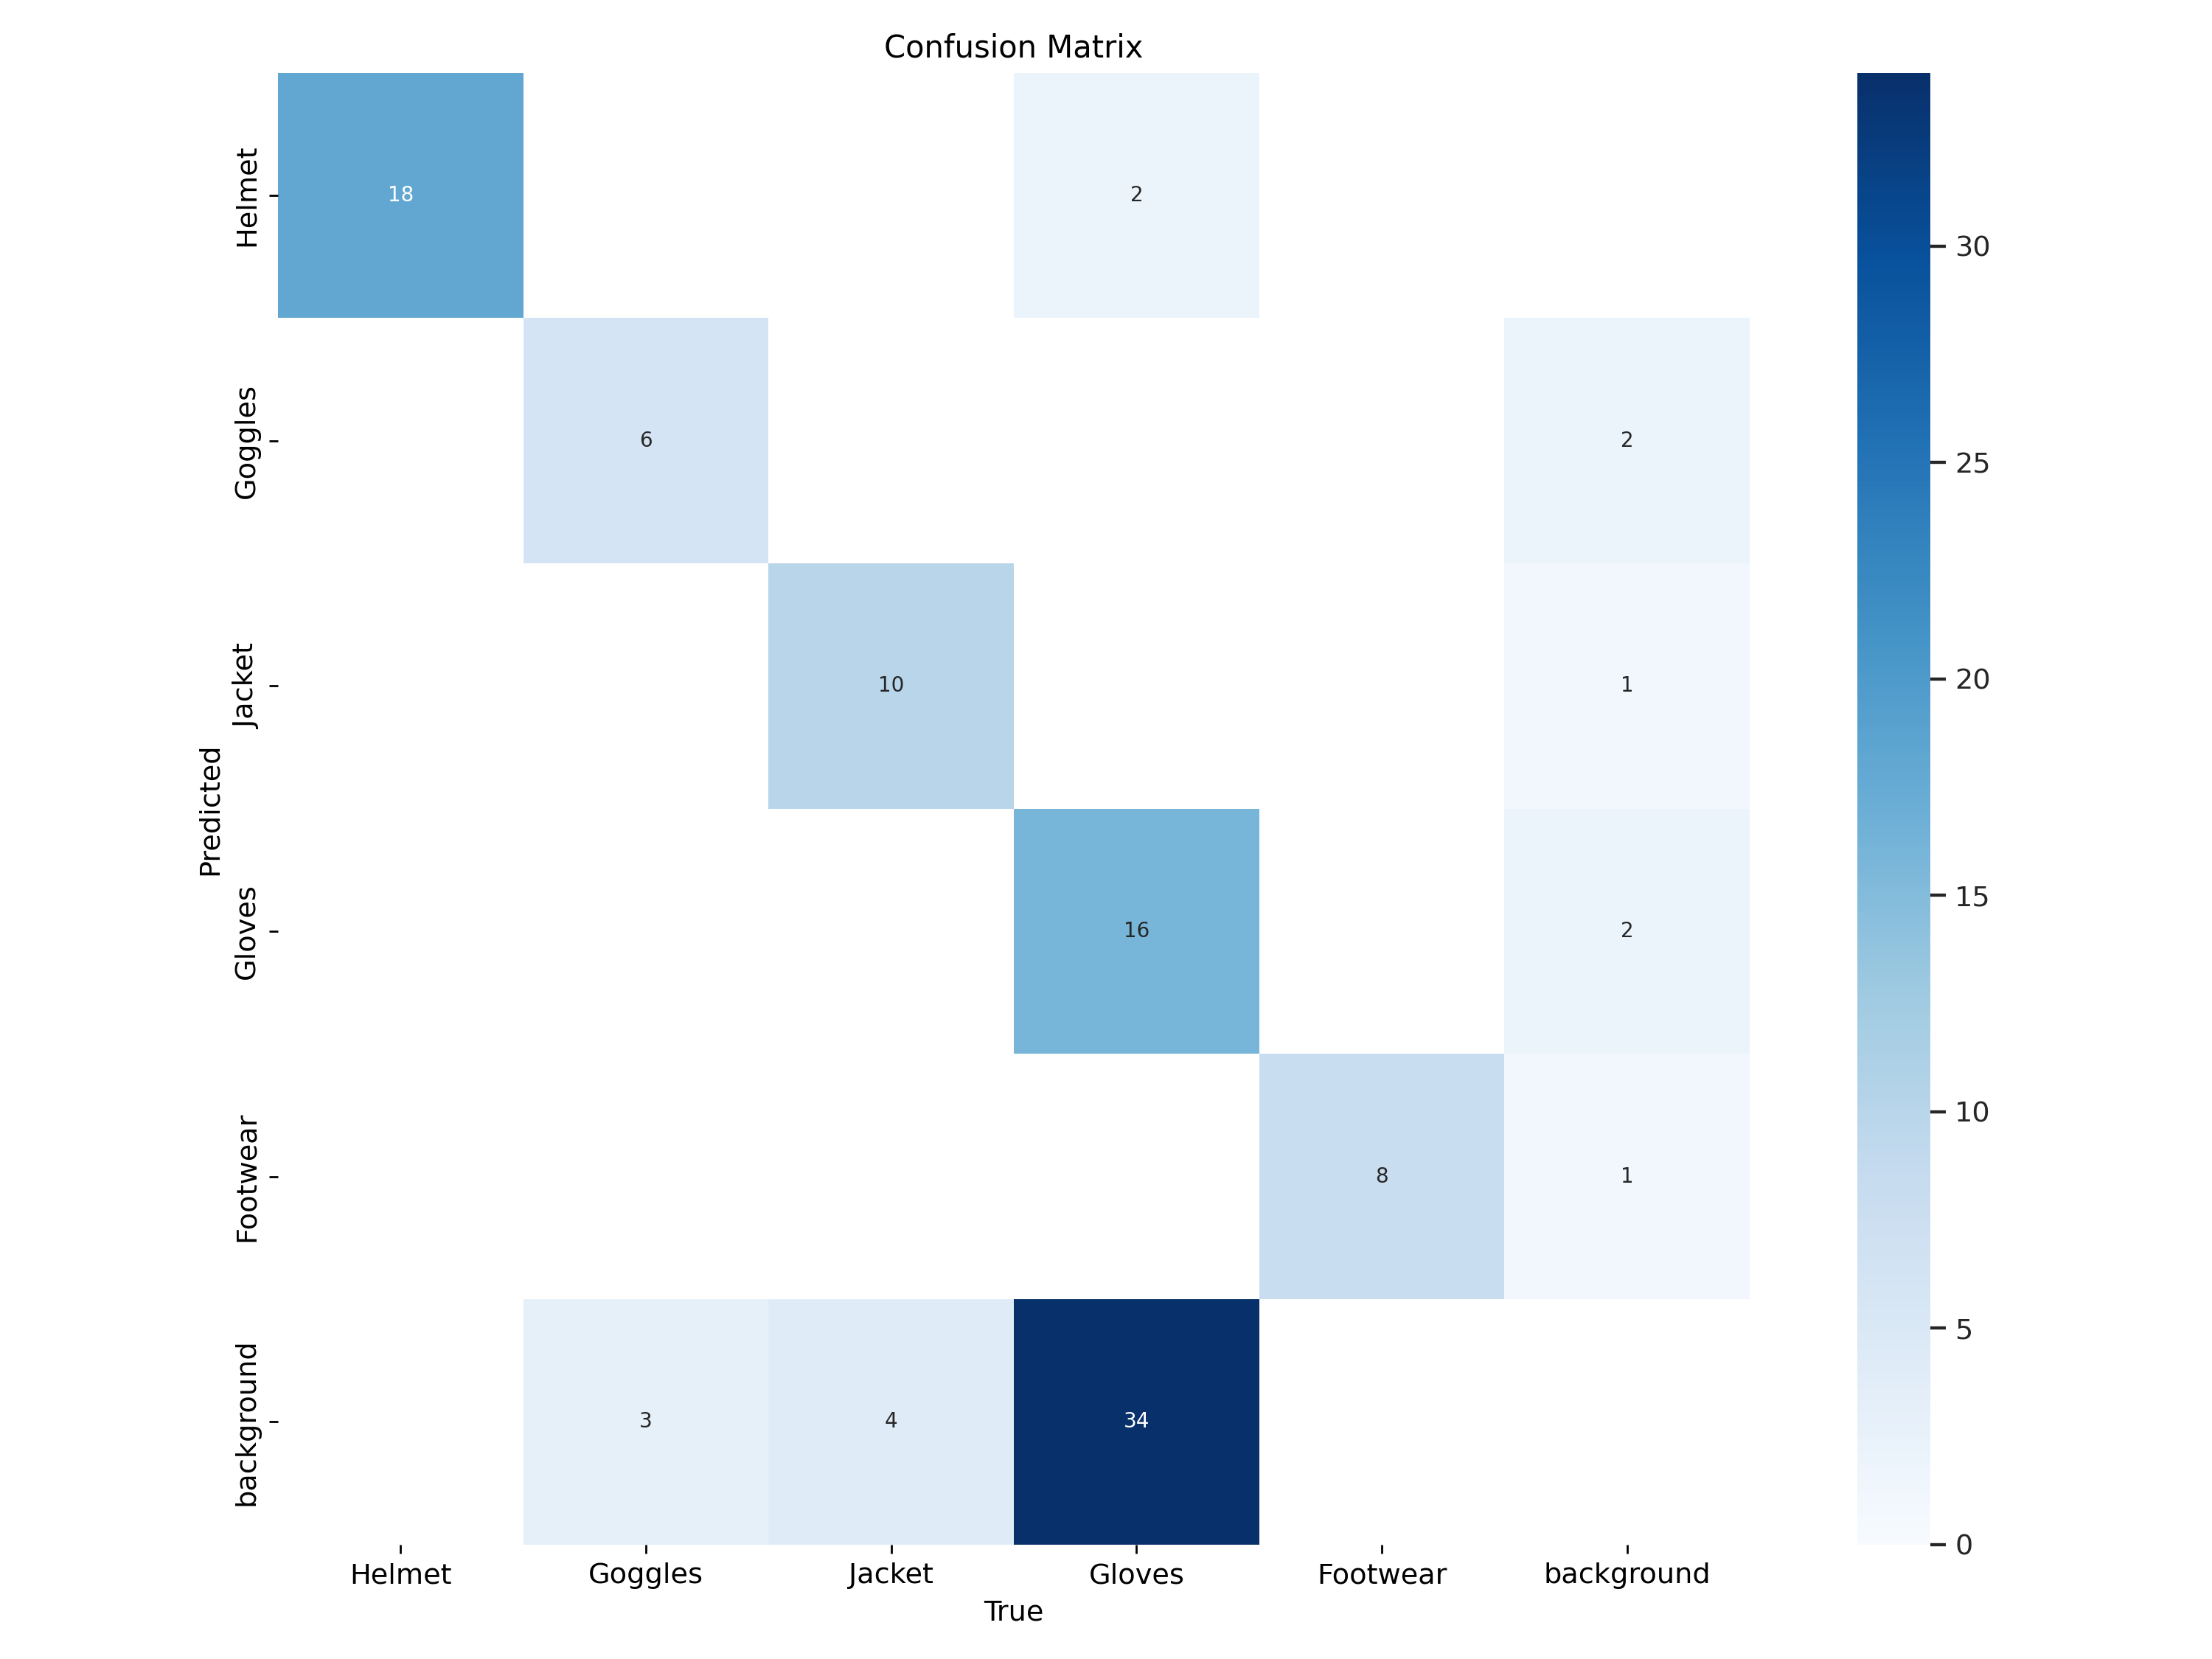

In [16]:
Image(filename='runs/detect/train/confusion_matrix.png', width=650)

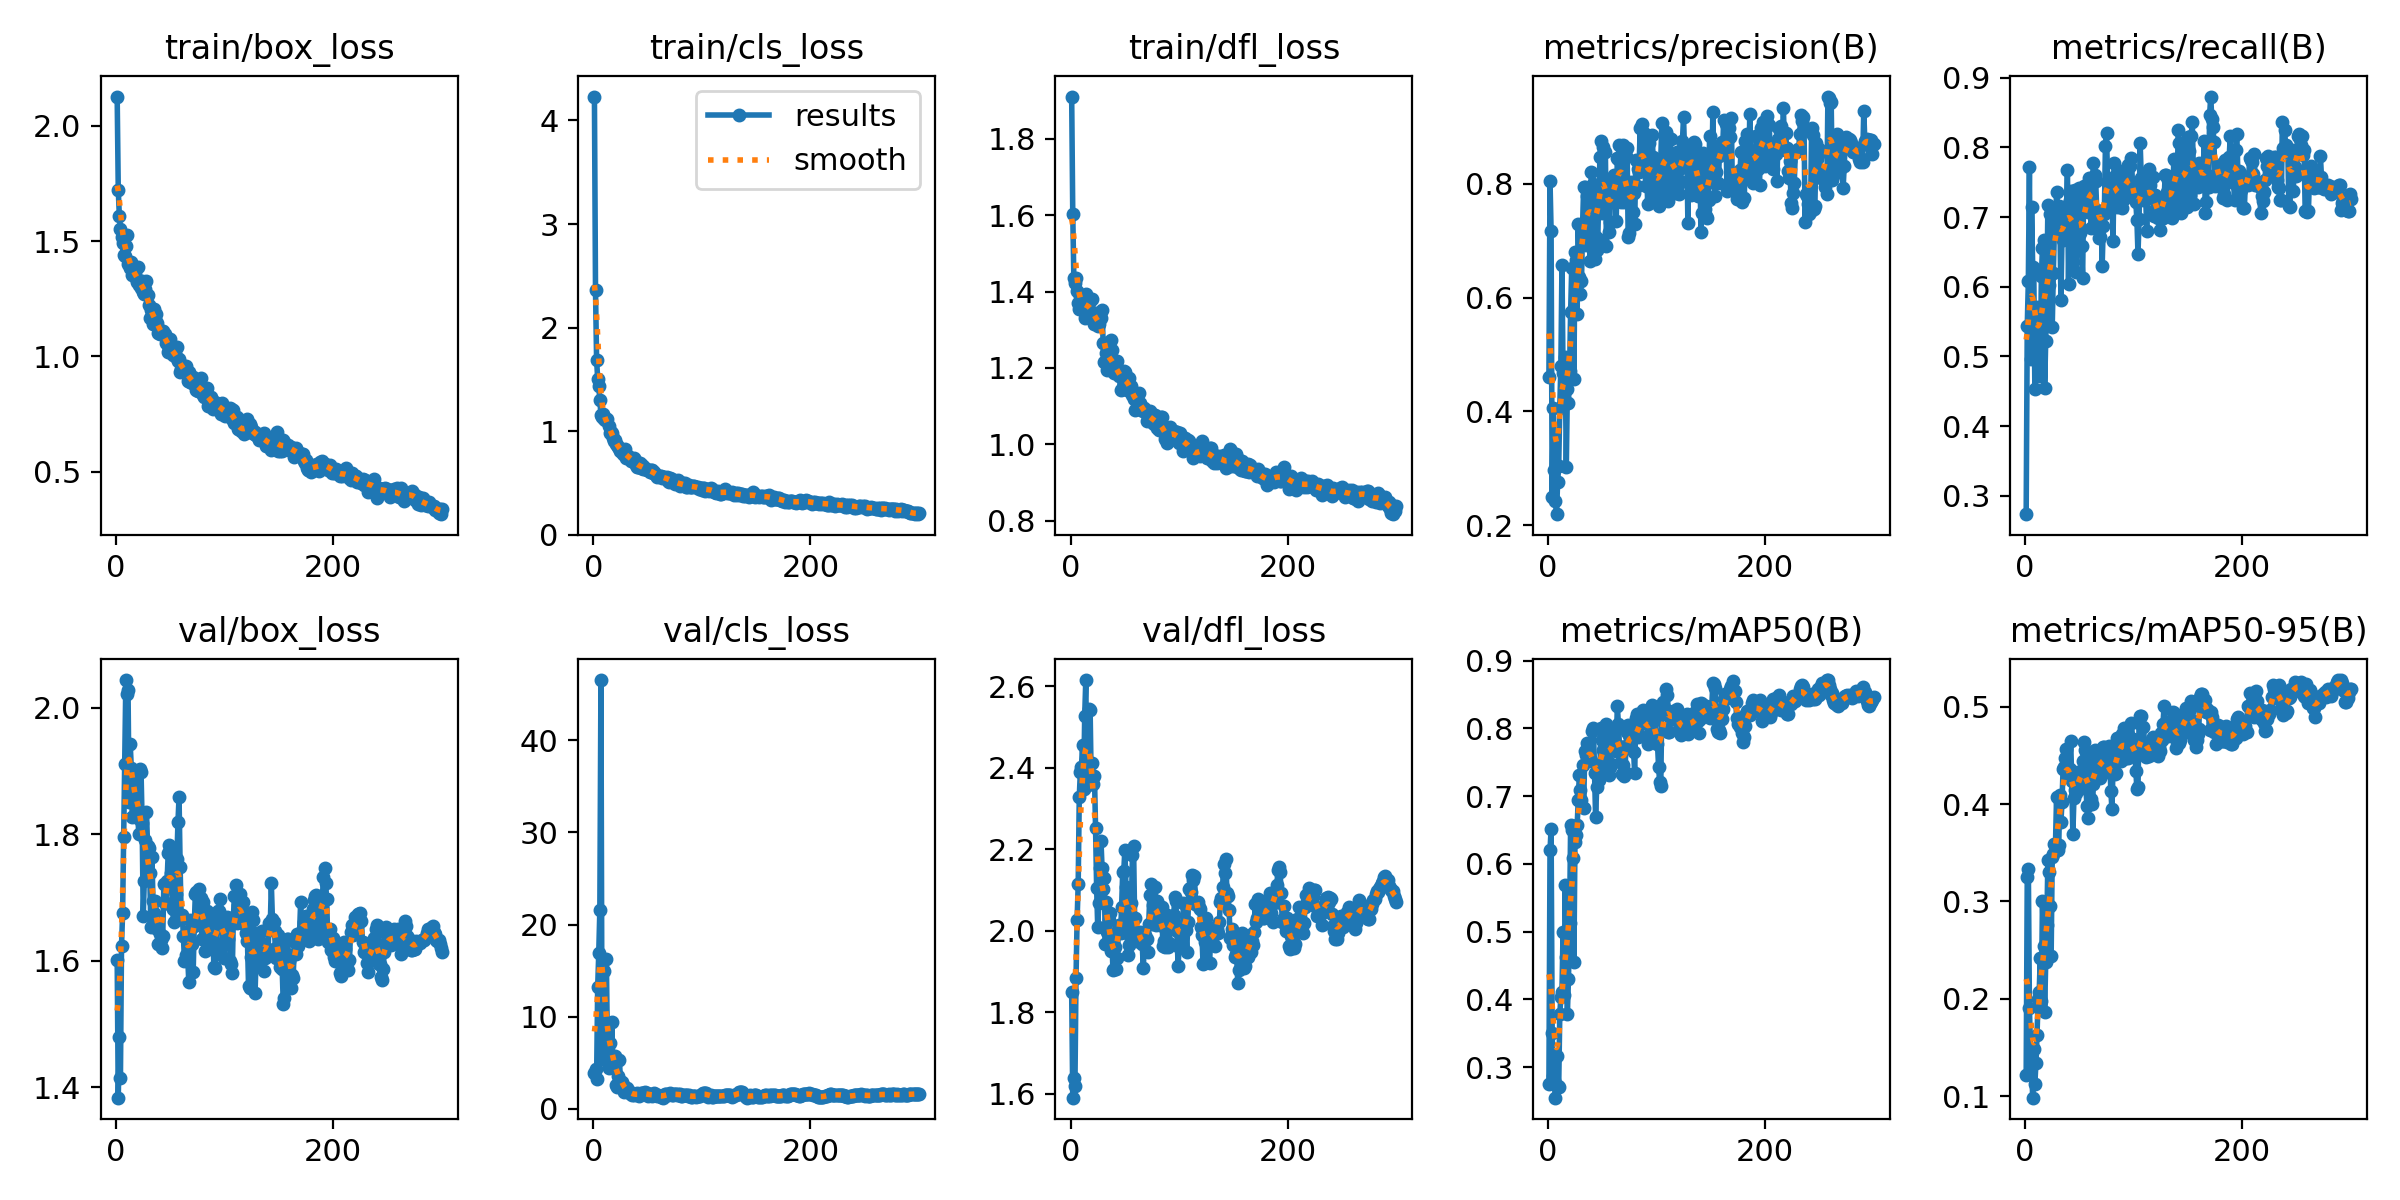

In [17]:
Image(filename='runs/detect/train/results.png', width=650)

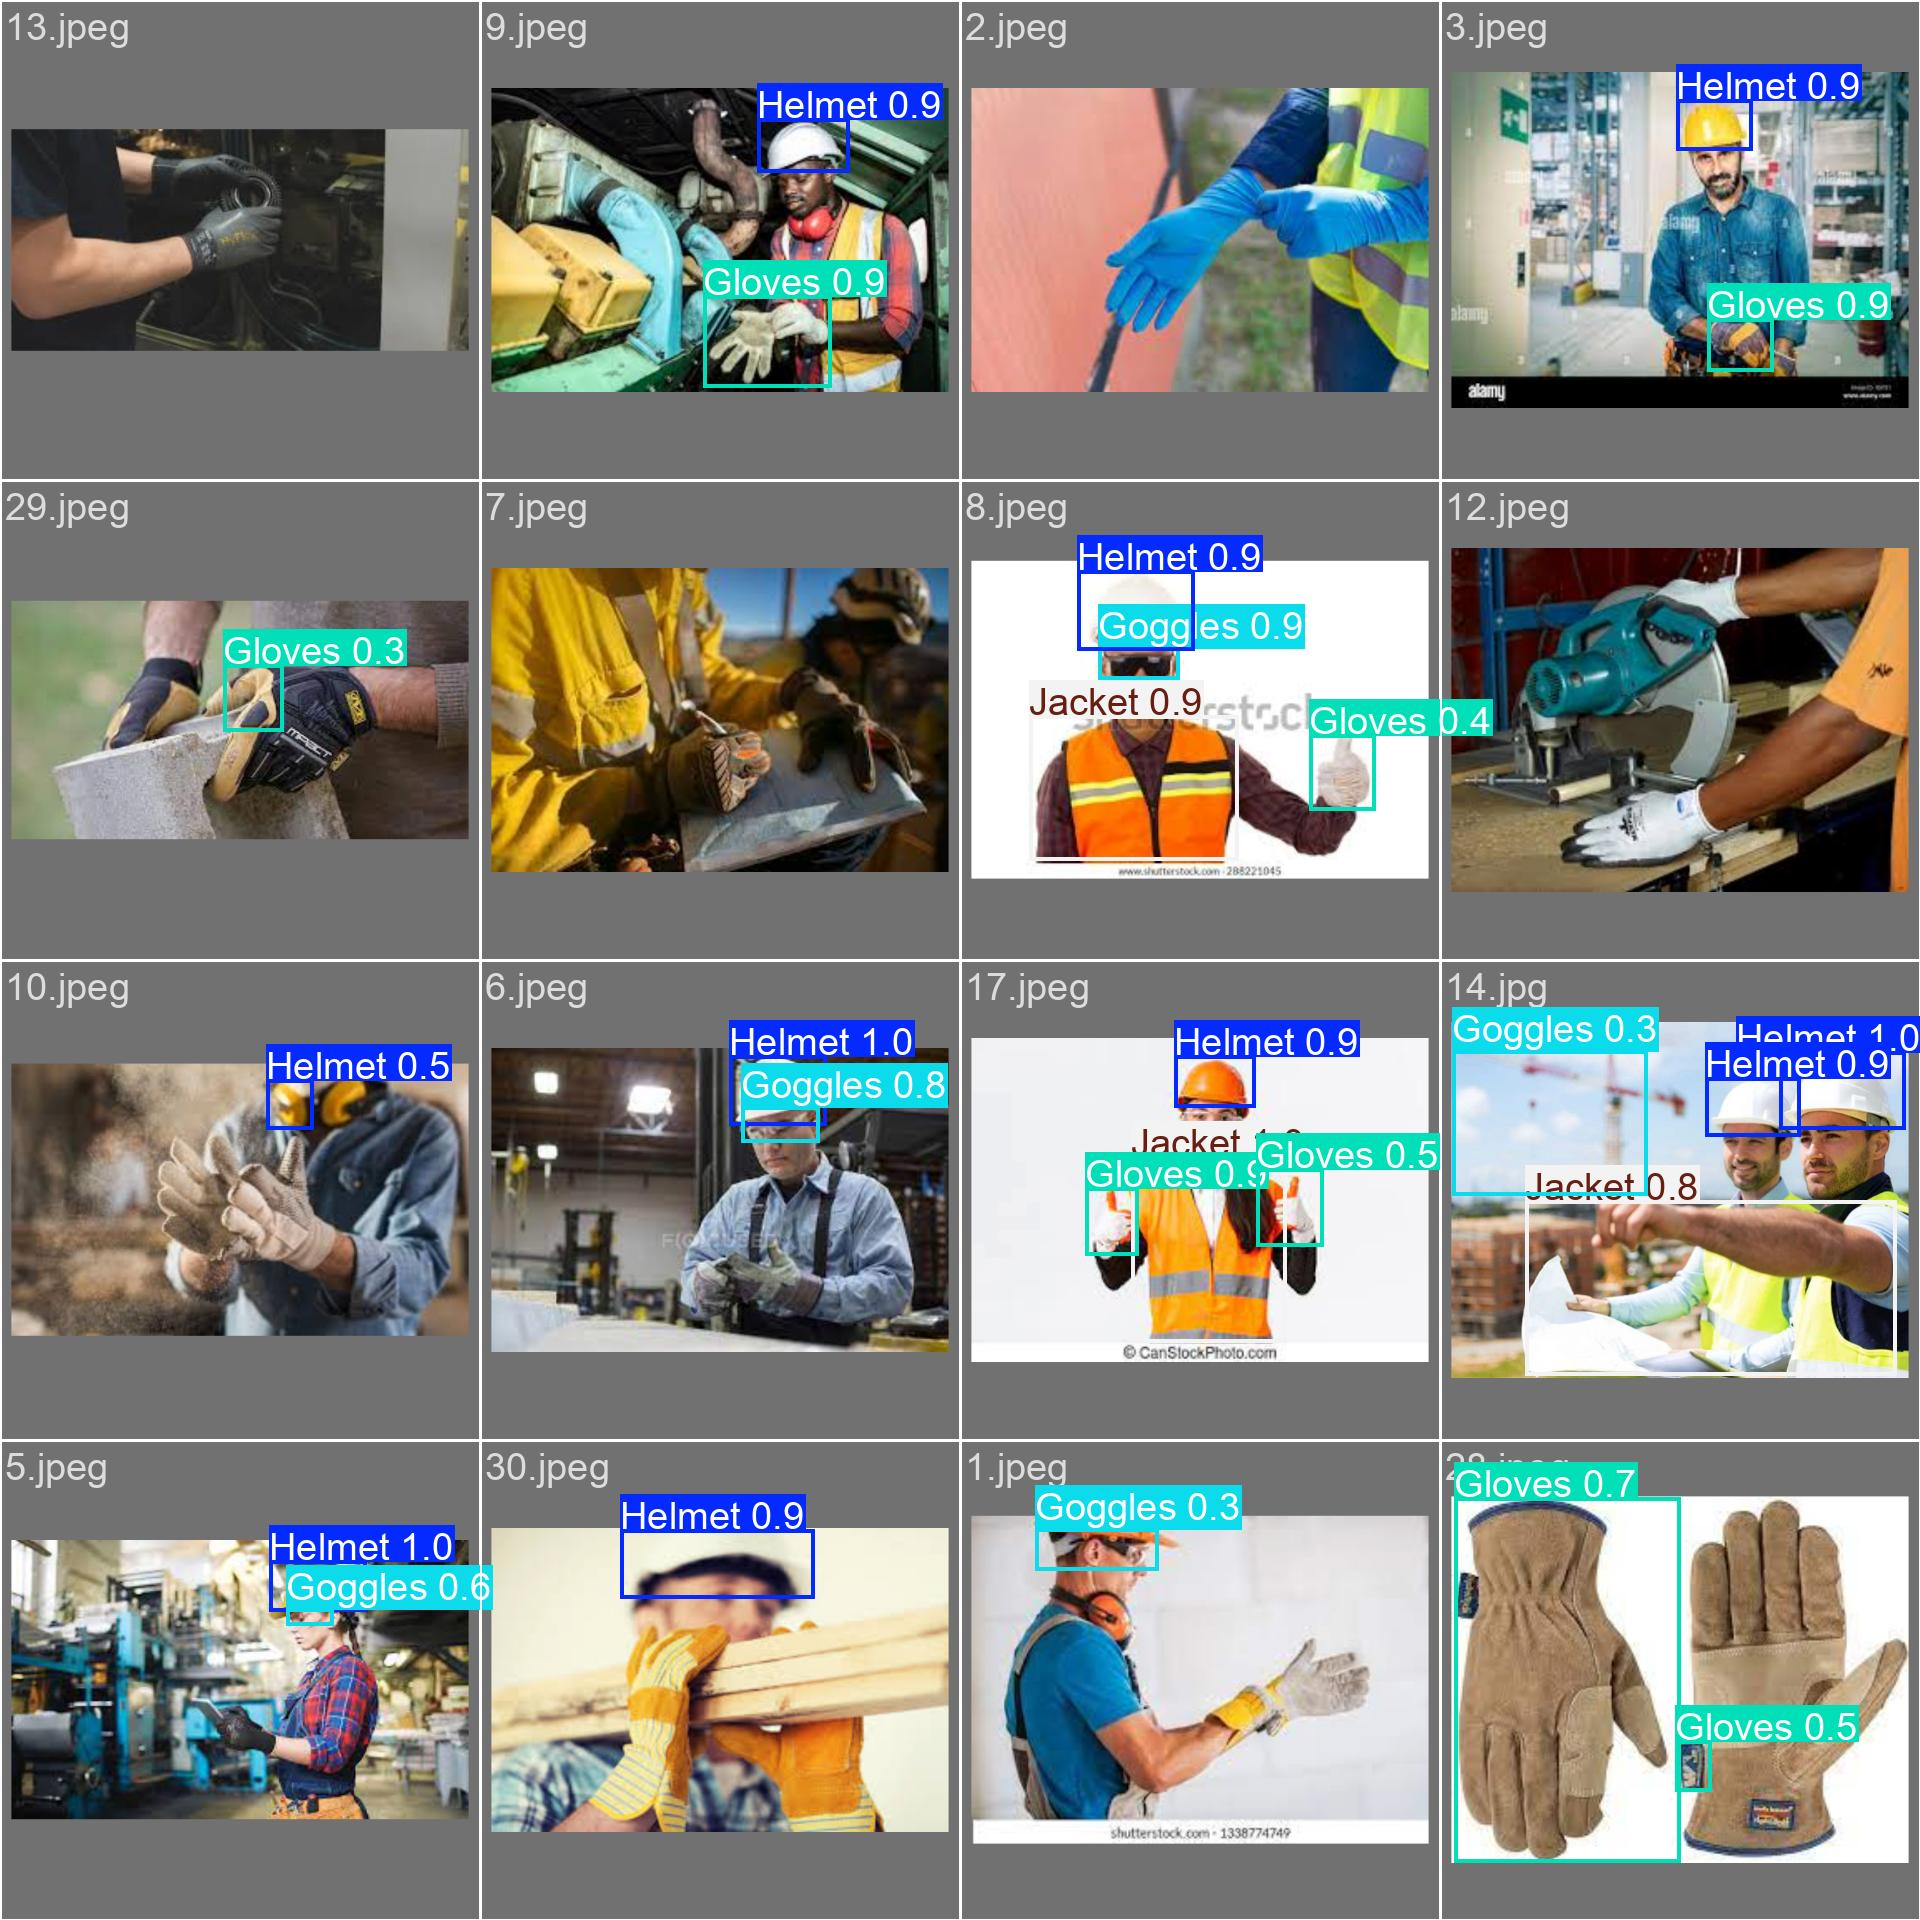

In [18]:
Image(filename='runs/detect/train/val_batch0_pred.jpg', width=650)

## Validate Custom Model

In [19]:
!yolo task=detect mode=val model=runs/detect/train/weights/best.pt data=data.yaml

Ultralytics YOLOv8.2.74 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25,842,655 parameters, 0 gradients, 78.7 GFLOPs
val: Scanning /content/drive/MyDrive/Industry_safety_equipments/valid/labels.cache... 31 images, 0 backgrounds, 0 corrupt: 100% 31/31 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 2/2 [00:02<00:00,  1.04s/it]
                   all         31        101      0.831      0.743      0.854      0.527
                Helmet         17         18      0.804          1      0.995      0.689
               Goggles          9          9      0.783      0.667      0.805      0.427
                Jacket         13         14      0.838      0.739      0.843        0.6
                Gloves         30         52      0.878      0.308      0.633      0.289
              Footwear          4          8      0.851          1      0.995      0.632
Speed: 0.2ms preproce

## Inference with Custom Model

In [20]:
!yolo task=detect mode=predict model=runs/detect/train/weights/best.pt conf=0.60 source=test/images

Ultralytics YOLOv8.2.74 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25,842,655 parameters, 0 gradients, 78.7 GFLOPs

image 1/31 /content/drive/MyDrive/Industry_safety_equipments/test/images/1.jpeg: 480x640 (no detections), 77.9ms
image 2/31 /content/drive/MyDrive/Industry_safety_equipments/test/images/10.jpeg: 384x640 (no detections), 162.4ms
image 3/31 /content/drive/MyDrive/Industry_safety_equipments/test/images/11.jpeg: 640x640 (no detections), 37.6ms
image 4/31 /content/drive/MyDrive/Industry_safety_equipments/test/images/12.jpeg: 512x640 (no detections), 154.2ms
image 5/31 /content/drive/MyDrive/Industry_safety_equipments/test/images/13.jpeg: 320x640 (no detections), 75.7ms
image 6/31 /content/drive/MyDrive/Industry_safety_equipments/test/images/14(1).jpeg: 640x608 (no detections), 77.4ms
image 7/31 /content/drive/MyDrive/Industry_safety_equipments/test/images/14.jpg: 512x640 2 Helmets, 1 Jacket, 28.5ms
image 8/31 /content/driv

**NOTE:** Let's take a look at few results.

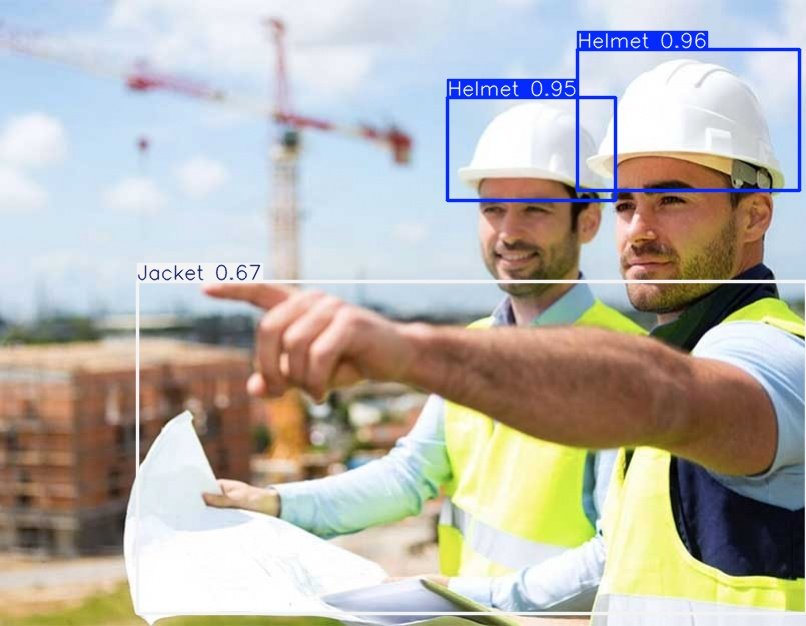

Displayed image: runs/detect/predict/14.jpg



In [18]:
import glob
from IPython.display import Image, display
from PIL import Image as PILImage

image_path = 'runs/detect/predict/14.jpg'

try:
    # Load and display the image using PIL and IPython display
    img = PILImage.open(image_path)
    display(img)
    print(f"Displayed image: {image_path}\n")
except Exception as e:
    print(f"Failed to display image {image_path}: {e}")


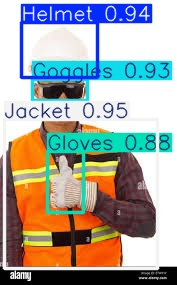

In [19]:
image_path = 'runs/detect/predict/16.jpeg'
display(Image(filename=image_path, width=500))